In [5]:
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


            id            sku  \
0    222529881  6084650718079   
1    183743642  9808599804519   
2    106318753  9403513241479   
3    273716533  7358286623584   
4    247719163  5731047077291   
..         ...            ...   
694  198458863  6140205922217   
695  253409946  7010410374781   
696  270206375  7109907565601   
697  270208639  2939897305132   
698  270207908  2778899464329   

                                     short_description     price  list_price  \
0    ASUS ExpertBook B1400 được thiết kế dành cho d...  14590000    19500000   
1    Đặc điểm nổi bật Laptop Cũ Lenovo ThinkPad L46...   4205000     6250000   
2    Thiết kế sang trọngLaptop Dell Latitude 3420 L...  14590000    19900000   
3    Primed to perform. Configured for your busines...  14490000    18890000   
4    ASUS ExpertBook B1400 được thiết kế dành cho d...  15190000    19999000   
..                                                 ...       ...         ...   
694  THÔNG TIN SẢN PHẨMThông số HP ProBook 

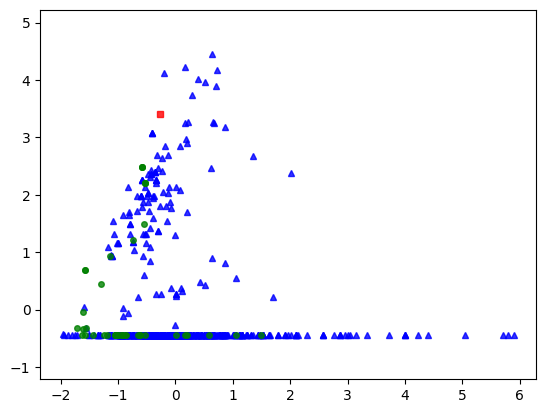

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def elbow_curve(X):
    dist = []
    clusters = [2, 3, 4, 5, 6, 7, 8, 9]
    for cluster in clusters:
        k_means = KMeans(n_clusters=cluster, max_iter=50).fit(X)
        dist.append(k_means.inertia_)
    
    scores = []

    for cluster in clusters:
        k_means = KMeans(n_clusters = cluster).fit(X)
        labels = k_means.labels_
        scores.append(silhouette_score(X, labels, metric = 'euclidean'))
    
        
    plt.figure(figsize=(10,6))
    plt.plot(clusters,scores)
    plt.show()

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

data = pd.read_csv('laptop_data_ncds.csv')
# elbow_curve(data.values[:, 1:])

# Select relevant features
features = ['price', 'discount', 'rating_average', 'review_count']

# Convert features to numeric type
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
print(data)
# Drop rows with missing values in selected features
data.dropna(subset=features, inplace=True)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Choose number of clusters
k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create DataFrame with cluster centers
cluster_means = pd.DataFrame(cluster_centers, columns=features)

print(cluster_means)

pred_label = kmeans.predict(data_scaled)
kmeans_display(data_scaled, pred_label)

